Dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
import pandas as pd

from pandas import DataFrame

KMEANS Test


Automatically created module for IPython interactive environment


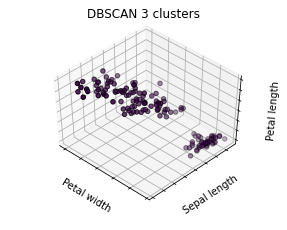

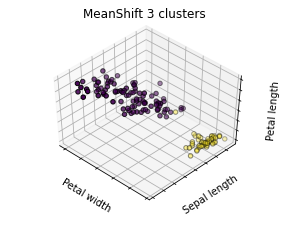

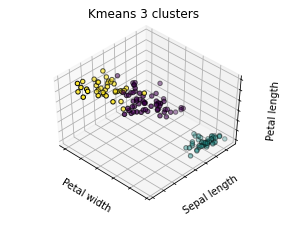

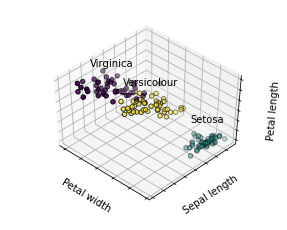

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn import cluster
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target
bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=200)

estimators = [('DB_scan_iris_3', DBSCAN(eps=7, min_samples=5)),
              ('Mean_Shift_iris_3', MeanShift(bandwidth=bandwidth, bin_seeding=True)),
              ('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['DBSCAN 3 clusters', 'MeanShift 3 clusters','Kmeans 3 clusters', 'Etiquetado correcto']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.dist = 12

fig.show()

DBScan Iris

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()
clt_DB = DBSCAN()
clt_DB = DBSCAN(eps=0.42)

#model_dbscan = clt_DB.fit(iris_X)
#pred_dbscan = model_dbscan.labels_

#plt.scatter(iris_X[pred_dbscan == 0, 0], iris_X[pred_dbscan == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
#plt.scatter(iris_X[pred_dbscan == 1, 0], iris_X[pred_dbscan == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
#plt.scatter(iris_X[pred_dbscan == 2, 0], iris_X[pred_dbscan == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')
#plt.scatter(iris_X[pred_dbscan == -1, 0], iris_X[pred_dbscan == -1, 1], s = 80, c = 'red', label = 'outlier')
#plt.legend()

Circle data set for test


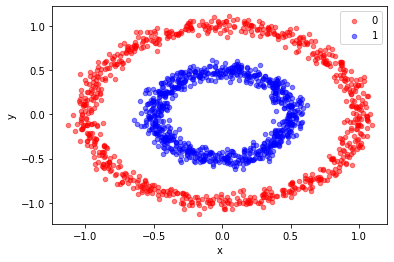

In [ ]:
n_samples = 1500
random_state = 170
X, y = datasets.make_circles(n_samples,  factor=.5, noise=0.05) # X
# scatter plot, dots colored by class value 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y)) 
colors = {0:'red', 1:'blue'} 
fig, ax = plt.subplots() 
grouped = df.groupby('label')
 
for key, group in grouped: 
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], alpha=0.5) 
plt.show()

KMeans


Text(0.5, 1.0, 'Predict')

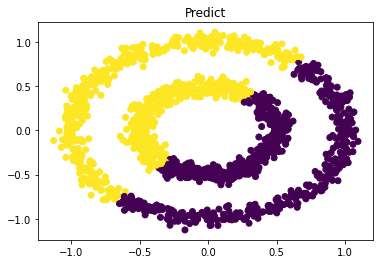

In [ ]:
y_pred = cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.title("Predict")

In [ ]:
print(y_pred[1:10])


[1 0 0 1 0 1 1 0 0]


DBScan

Text(0.5, 1.0, 'Predict')

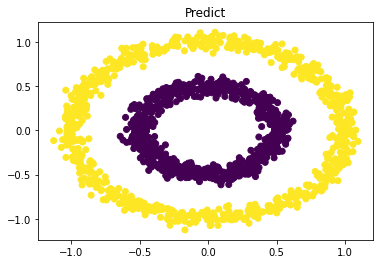

In [ ]:
y_pred = cluster.DBSCAN(eps=0.2, min_samples=5).fit(X)
 
plt.scatter(X[:, 0], X[:, 1], c=y_pred.labels_.astype(np.int)) 
plt.title("Predict")



In [ ]:
print(y_pred.labels_[1:10])


[1 1 0 1 0 0 0 0 1]


MeanShift

Text(0.5, 1.0, 'Predict')

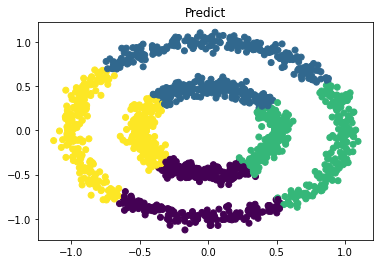

In [ ]:
bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=200) 
y_pred = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)
 
plt.scatter(X[:, 0], X[:, 1], c=y_pred.labels_.astype(np.int))
plt.title("Predict")

In [ ]:
print(y_pred.labels_[1:10])

[3 2 2 1 2 3 1 1 0]
